## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema

Para el siguiente problema se puede guiar del siguiente notebook [gradiente descendiente](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb)

Considere el potencial electrico entre dos cargas de la misma magnitud pero de signo opuesto medido en la posición $\vec{r}$ desde el centro de coordenadas dado por,

$$ V(\vec{r}) = \frac{q}{4\pi \epsilon_0}\Bigg[\frac{1}{|\vec{r}-\vec{r_+}|}-\frac{1}{|\vec{r}-\vec{r_-}|}\Bigg], $$

donde $\vec{r_+}$, y $\vec{r_-}$, son las posiciones de las cargas positivas y negativas respectivamente. En este ejercicio solamente nos vamos a enfocar en las dimensiones $x$ y $y$.

Dados los siguientes parametros, 

$$\vec{r_+} = (-0.25\text{ m}, 0), \quad \vec{r_-} = (0.25\text{ m}, 0), \quad \frac{q}{4\pi \epsilon_0} = 1, $$

y que el campo electrico está dado por, 

$$\vec{E}(\vec{r}) = -\vec{\nabla} V(\vec{r}),$$

a) Escriba la función potencial en términos de $x$ y $y$ e imprima los valores del potencial en el punto $(x, y) = (0, 0)$ y $(x, y) = (0.1, 0)$, $(x, y) = (-0.15, 0.12)$.

In [2]:
def Potential(x, y):
    r_p = np.array([-0.25,0])
    r_n = np.array([0.25,0])
    r = np.array([x,y])
    V = 1/np.linalg.norm(r-r_p) - 1/np.linalg.norm(r-r_n)
    return V
# codigo para verificar su resultado no modificar
Potential(0, 0), Potential(0.1, 0), Potential(-0.15, 0.12)

(0.0, -3.8095238095238098, 4.007278283591919)

b) Calcule la gradiente del potencial, con la formula de derivada central.

In [3]:
def central_derivative(f, x, h):
    df = (f(x+h) - f(x-h))/(2*h)
    return df

In [4]:
def Gradient_xy(f, x, y, h): 
    grad = np.array([0, 0])
    grad[0] = central_derivative(lambda x: f(x, y), x, h)
    grad[1] = central_derivative(lambda y: f(x, y), y, h)
    
    return grad

# codigo para verificar su resultado no modificar
Gradient_xy(Potential, 0, 0, 0.0001), Gradient_xy(Potential, 0.1, 0.05, 0.0001), Gradient_xy(Potential, -0.15, 0.12, 0.0001)

(array([-32,   0]), array([-45,  11]), array([-31, -29]))

c) Empezando en el punto $(x, y) = (0, 0.15)$ implemente el algoritmo de gradiente descendiente. Con pasos 683 pasos de $e = 0.0001$ para el gradiente descendiente y $h = 0.0001$ para la derivada central. Guarde la trayectoria en la variable `trayectory`

El algoritmo gradiente descendiente tiene la siguiente forma



```
loss_function := Potential function that you wish to minimize
min_value := initial_value
e := the step size of the gradient descent
num_steps := num of times that the GD looks for the minima


for i in range(num_steps)
  min_value = min_value - e * grad_loss_function(min_value)
```

Puede seguir el siguiente [notebook](https://github.com/diegour1/CompMetodosComputacionales/blob/main/Notebooks/08%20-%20Gradient_Descent_Neural_Networks.ipynb)




In [5]:
trayectory = []
# su codigo aqui
loss_function = lambda x, y: Potential(x, y)
min_value = np.array([0, 0.15])
e = 0.0001
steps = 683

for i in range(steps):
    min_value = min_value - e * Gradient_xy(loss_function, min_value[0], min_value[1], 0.0001)
    trayectory.append(min_value)

trayectory = np.array(trayectory)


# codigo para verificar su resultado no modificar
print(trayectory[-1])

[ 1.6203 -1.5486]


d) Gráfique con la misma escala en x y y, las dos cargas y la trayectoria.

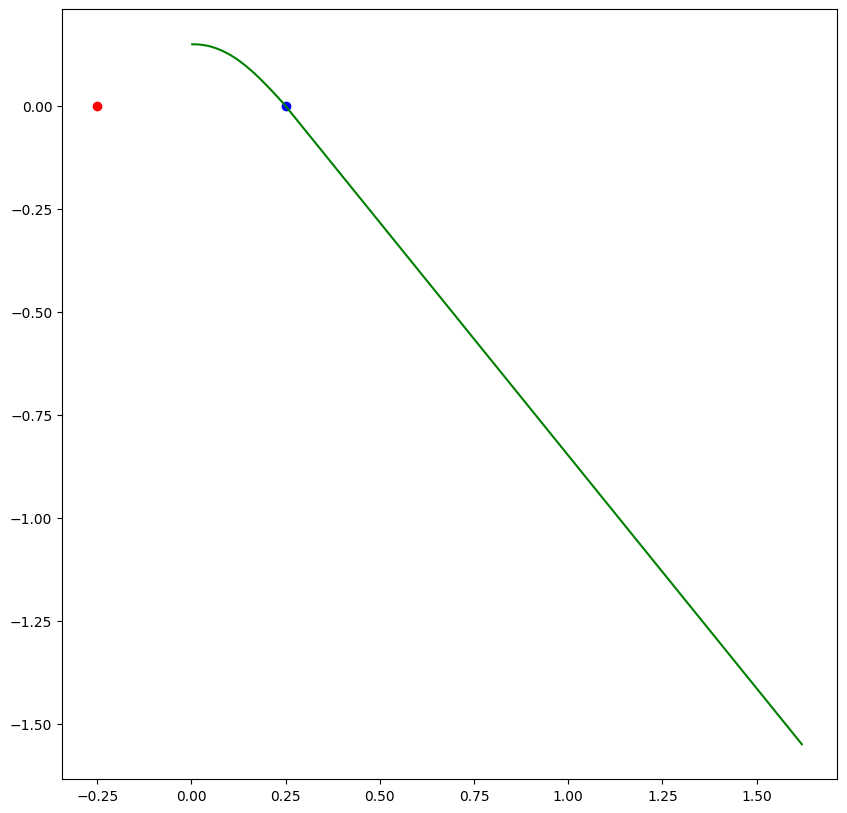

In [6]:
# Graficar las 2 cargas y su trayectoria
plt.figure(figsize=(10,10))
r_p = np.array([-0.25,0])
r_n = np.array([0.25,0])
T_x = trayectory[:,0]
T_y = trayectory[:,1]
plt.plot(r_p[0], r_p[1], 'o', color='red')
plt.plot(r_n[0], r_n[1], 'o', color='blue')
plt.plot(T_x, T_y, color='green')


In [9]:
print(np.shape(trayectory))

(683, 2)


e) ¿Qué significa físicamente la trayectoria?